In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import re

In [3]:
directory = Path("../data/raw/Help Desk Tickets")

dfi    = pd.read_csv(directory    / "issues.csv",                low_memory = False)
dfs    = pd.read_csv(directory    / "issues_snapshot.csv",       low_memory = False)
dfch   = pd.read_csv(directory    / "issues_change_history.csv", low_memory = False)
dfu    = pd.read_csv(directory    / "sample_utterances.csv",     low_memory = False)
dfrate = pd.read_excel(directory  / "issues_snapshot_sample.xlsx")

datasets = {"Issues"         : dfi,
            "Snapshot"       : dfs,
            "Change History" : dfch,
            "Utterances"     : dfu,
            "Rated Sample"   : dfrate}

In [7]:
for name, df in datasets.items():
    print(
        f"{name.upper()}\n\n"
        f"Columns: {df.shape[1]}\n"
        f"Rows: {df.shape[0]}\n\n"
        f"Variables: {", ".join(df.columns)}\n")
    display(df.head(3))
    print("\n\n")

ISSUES

Columns: 58
Rows: 66691

Variables: id, started, ended, issue_num, issue_proj, issue_reporter, issue_assignee, issue_contr_count, issue_type, issue_priority, issue_created, issue_resolution_date, issue_resolution, issue_status, issue_comments_count, last_change_date, wf_in_review, wfe_in_review, wf_deployment, wfe_deployment, wf_resolved, wfe_resolved, wf_open, wfe_open, wf_monitoring, wfe_monitoring, wf_done, wfe_done, wf_pending_customer_approval, wfe_pending_customer_approval, wf_rejected, wfe_rejected, wf_testing_monitoring, wfe_testing_monitoring, wf_in_progress, wfe_in_progress, wf_reopened, wfe_reopened, wf_to_do, wfe_to_do, wf_validation, wfe_validation, wf_resolved_under_monitoring, wfe_resolved_under_monitoring, wf_closed, wfe_closed, wf_waiting, wfe_waiting, wf_cancelled, wfe_cancelled, wf_under_review, wfe_under_review, wf_approved, wfe_approved, wf_pending_deployment, wfe_pending_deployment, wf_total_time, processing_steps



,id,started,ended,issue_num,issue_proj,issue_reporter,issue_assignee,issue_contr_count,issue_type,issue_priority,...,wf_cancelled,wfe_cancelled,wf_under_review,wfe_under_review,wf_approved,wfe_approved,wf_pending_deployment,wfe_pending_deployment,wf_total_time,processing_steps
0,11887.0,2016-01-06 08:23:43+00:00,2016-01-06 08:56:55+00:00,186.0,d1z0,4olg,NaN,1.0,Ticket,Medium,...,NaN,0,NaN,0,NaN,0,NaN,0,1992.0,2
1,11890.0,2016-01-11 10:06:19+00:00,2016-01-12 12:30:23+00:00,190.0,d1z0,4olg,NaN,1.0,Ticket,Medium,...,NaN,0,NaN,0,NaN,0,NaN,0,95044.0,2
2,11904.0,2016-01-21 07:28:20+00:00,2016-01-26 08:21:47+00:00,198.0,d1z0,4ohk,4ohk,1.0,Ticket,Medium,...,NaN,0,NaN,0,NaN,0,NaN,0,435207.0,2





SNAPSHOT

Columns: 60
Rows: 90963

Variables: idx, id, started, ended, issue_num, issue_proj, issue_reporter, issue_assignee, issue_contr_count, issue_type, issue_priority, issue_created, issue_resolution_date, issue_resolution, issue_status, issue_comments_count, last_change_date, wf_in_review, wfe_in_review, wf_deployment, wfe_deployment, wf_resolved, wfe_resolved, wf_open, wfe_open, wf_monitoring, wfe_monitoring, wf_done, wfe_done, wf_pending_customer_approval, wfe_pending_customer_approval, wf_rejected, wfe_rejected, wf_testing_monitoring, wfe_testing_monitoring, wf_in_progress, wfe_in_progress, wf_reopened, wfe_reopened, wf_to_do, wfe_to_do, wf_validation, wfe_validation, wf_resolved_under_monitoring, wfe_resolved_under_monitoring, wf_closed, wfe_closed, wf_waiting, wfe_waiting, wf_cancelled, wfe_cancelled, wf_under_review, wfe_under_review, wf_approved, wfe_approved, wf_pending_deployment, wfe_pending_deployment, turn, wf_total_time, processing_steps



,idx,id,started,ended,issue_num,issue_proj,issue_reporter,issue_assignee,issue_contr_count,issue_type,...,wfe_cancelled,wf_under_review,wfe_under_review,wf_approved,wfe_approved,wf_pending_deployment,wfe_pending_deployment,turn,wf_total_time,processing_steps
0,0,11887.0,2016-01-06 08:23:43+00:00,2016-01-06 08:56:55+00:00,186.0,d1z0,4olg,NaN,1.0,Ticket,...,0,NaN,0,NaN,0,NaN,0,1,1992.0,2
1,1,11890.0,2016-01-11 10:06:19+00:00,2016-01-12 12:30:23+00:00,190.0,d1z0,4olg,NaN,1.0,Ticket,...,0,NaN,0,NaN,0,NaN,0,1,95044.0,2
2,2,11904.0,2016-01-21 07:28:20+00:00,2016-01-26 08:21:47+00:00,198.0,d1z0,4ohk,4ohk,1.0,Ticket,...,0,NaN,0,NaN,0,NaN,0,1,435207.0,2





CHANGE HISTORY

Columns: 6
Rows: 257508

Variables: id, issueid, field, value, created, change_group_id



,id,issueid,field,value,created,change_group_id
0,10810.0,47751000.0,status,resolved,2016-03-24 15:35:53+00:00,10707.0
1,10821.0,47751000.0,status,resolved,2016-03-24 16:12:16+00:00,10715.0
2,10823.0,47751000.0,status,reopened,2016-03-24 16:12:19+00:00,10716.0





UTTERANCES

Columns: 9
Rows: 30104

Variables: issueid, id, comment_seq, utr_seq, author, created, is_private, actionbody, author_role



,issueid,id,comment_seq,utr_seq,author,created,is_private,actionbody,author_role
0,1004298.0,211718014.0,0,0,.wy0w13yhr,2022-01-02 11:12:51+00:00,0.0,dear ph_name team,reporter
1,1004298.0,211718014.0,0,1,.wy0w13yhr,2022-01-02 11:12:51+00:00,0.0,we need your urgent support to fix list of vul...,reporter
2,1004298.0,211718014.0,0,2,.wy0w13yhr,2022-01-02 11:12:51+00:00,0.0,please provide resolution date before end of ‘...,reporter





RATED SAMPLE

Columns: 19
Rows: 747

Variables: id, no, project, reporter, type, priority, contributors, turn_no, assignee, started, ended, spent hours, steps, comments count, valid, Q1, Q2, Q3, Notes



,id,no,project,reporter,type,priority,contributors,turn_no,assignee,started,ended,spent hours,steps,comments count,valid,Q1,Q2,Q3,Notes
0,1004298.0,346.0,C11gg0w13,.wy0w13yhr,Ticket,High,1.0,1,4ops,2022-01-02 11:12:51+00:00,2022-05-24 05:40:13+00:00,3402.456,2,49,True,5,5,5,This is an HD-Service
1,1004357.0,155.0,C01gg1_3_,z8y1_3_ygi,Ticket,Medium,1.0,1,4lip,2022-01-05 05:27:14+00:00,2022-01-12 07:47:47+00:00,170.342,3,4,True,3,4,4,This is an HD-Service and looks like communica...
2,1004361.0,14.0,C02hk0x93,0ny0x93yik,Ticket,Medium,3.0,1,4hghs,2022-01-05 06:50:56+00:00,2022-01-05 06:55:23+00:00,0.074,2,3,True,5,5,5,Service Desk user did his work perfectly same ...


In [9]:
def dtype_col(df):
    dtype_to_col = {}

    for variable, dtype in df.dtypes.items():
        dtype_str = str(dtype)

        if dtype_str not in dtype_to_col:
            dtype_to_col[dtype_str] = []

        dtype_to_col[dtype_str].append(variable)

    return pd.DataFrame({dtype: pd.Series(vars_) for dtype, vars_ in dtype_to_col.items()})

id_columns = ["id", "issueid", "idx"]

for name, df in datasets.items():
    convert_col = [c for c in id_columns if c in df.columns]
    df[convert_col] = df[convert_col].astype("object")
    

for name, df in datasets.items():
    print(f"\n{name.upper()}")
    display(dtype_col(df))


ISSUES


,object,float64,int64
0,id,issue_num,issue_comments_count
1,started,issue_contr_count,wfe_in_review
2,ended,wf_in_review,wfe_deployment
3,issue_proj,wf_deployment,wfe_resolved
4,issue_reporter,wf_resolved,wfe_open
5,issue_assignee,wf_open,wfe_monitoring
6,issue_type,wf_monitoring,wfe_done
7,issue_priority,wf_done,wfe_pending_customer_approval
8,issue_created,wf_pending_customer_approval,wfe_rejected
9,issue_resolution_date,wf_rejected,wfe_testing_monitoring



SNAPSHOT


,object,float64,int64
0,idx,issue_num,issue_comments_count
1,id,issue_contr_count,wfe_in_review
2,started,wf_in_review,wfe_deployment
3,ended,wf_deployment,wfe_resolved
4,issue_proj,wf_resolved,wfe_open
5,issue_reporter,wf_open,wfe_monitoring
6,issue_assignee,wf_monitoring,wfe_done
7,issue_type,wf_done,wfe_pending_customer_approval
8,issue_priority,wf_pending_customer_approval,wfe_rejected
9,issue_created,wf_rejected,wfe_testing_monitoring



CHANGE HISTORY


,object,float64
0,id,change_group_id
1,issueid,NaN
2,field,NaN
3,value,NaN
4,created,NaN



UTTERANCES


,object,int64,float64
0,issueid,comment_seq,is_private
1,id,utr_seq,NaN
2,author,NaN,NaN
3,created,NaN,NaN
4,actionbody,NaN,NaN
5,author_role,NaN,NaN



RATED SAMPLE


,object,float64,int64,bool
0,id,no,turn_no,valid
1,project,contributors,steps,NaN
2,reporter,spent hours,comments count,NaN
3,type,NaN,Q1,NaN
4,priority,NaN,Q2,NaN
5,assignee,NaN,Q3,NaN
6,started,NaN,NaN,NaN
7,ended,NaN,NaN,NaN
8,Notes,NaN,NaN,NaN


In [10]:
for name, df in datasets.items():
    print(
        f"{name.title()}:",
        df.duplicated().sum())

print("There are no duplicates in the datasets.")

Issues: 0
Snapshot: 0
Change History: 0
Utterances: 0
Rated Sample: 0
There are no duplicates in the datasets.


In [14]:
print("Issues:",   dfi.duplicated(["id"]).sum(), "ticket issues share the same ID.")
print("Snapshot:", dfs.duplicated(["id"]).sum(), "rows that share the same ID (same ticket appears multiple times through updates).")
print("Change:",   dfch.duplicated(["issueid", "change_group_id"]).sum(), "rows share the same Issue-ID & Change-Group-ID update.")

Issues: 0 ticket issues share the same ID.
Snapshot: 24272 rows that share the same ID (same ticket appears multiple times through updates).
Change: 6 rows share the same Issue-ID & Change-Group-ID update.


In [117]:
# as a table
def missingness(name, df):
    miss = (df.isna().mean() * 100).sort_values(ascending = False).round(2) # amount of missing values in percent
    miss = miss[~miss.index.str.startswith(("wf_", "wfe_"))]                # except for workflow variables
    print(f"Percentage of Missing Entries in: {name.title()}")              # title
    display(miss.to_frame("%"))                                             # table


for name, df in datasets.items():
    missingness(name, df)

Percentage of Missing Entries in: Issues


,%
issue_assignee,46.55
issue_resolution_date,1.28
issue_resolution,1.28
last_change_date,0.00
issue_priority,0.00
id,0.00
issue_status,0.00
issue_created,0.00
issue_comments_count,0.00
started,0.00


Percentage of Missing Entries in: Snapshot


,%
issue_assignee,34.13
issue_resolution_date,1.59
issue_resolution,1.59
last_change_date,0.00
issue_created,0.00
issue_priority,0.00
started,0.00
idx,0.00
issue_comments_count,0.00
issue_status,0.00


Percentage of Missing Entries in: Change History


,%
value,0.71
id,0.00
issueid,0.00
field,0.00
created,0.00
change_group_id,0.00


Percentage of Missing Entries in: Utterances


,%
actionbody,0.08
issueid,0.00
id,0.00
utr_seq,0.00
comment_seq,0.00
author,0.00
created,0.00
is_private,0.00
author_role,0.00


Percentage of Missing Entries in: Rated Sample


,%
id,51.81
no,51.81
project,51.81
reporter,51.81
type,51.81
priority,51.81
contributors,51.81
Notes,34.14
assignee,2.54
started,0.00


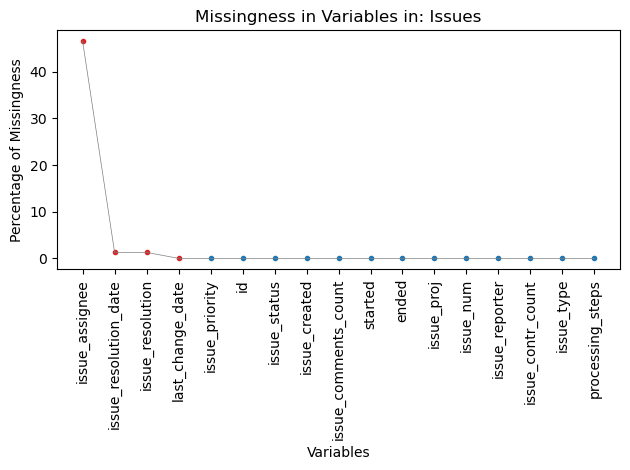

Note: Red points indicate some extent of missingness. Variables for workflow steps are excluded.




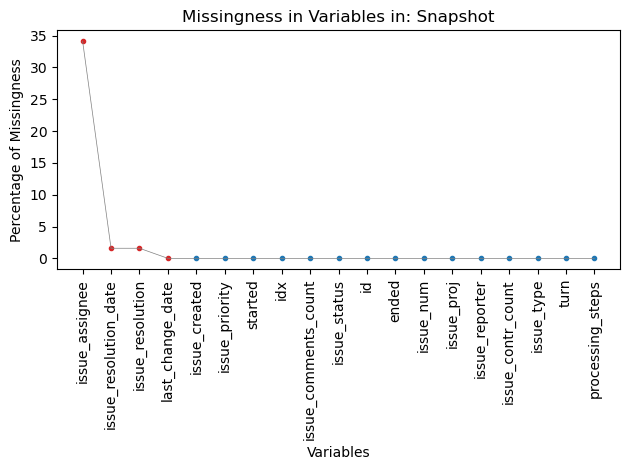

Note: Red points indicate some extent of missingness. Variables for workflow steps are excluded.




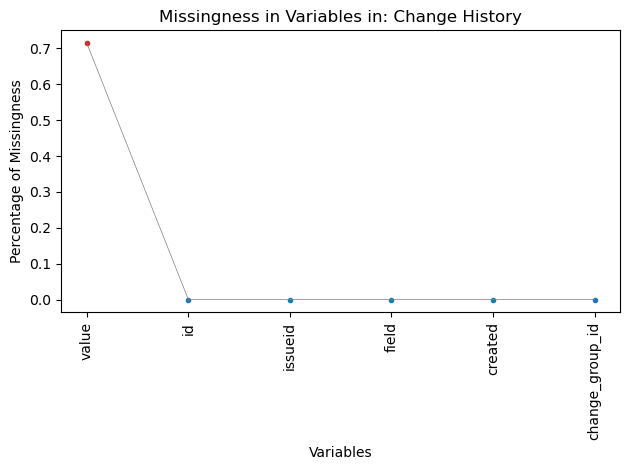

Note: Red points indicate some extent of missingness. Variables for workflow steps are excluded.




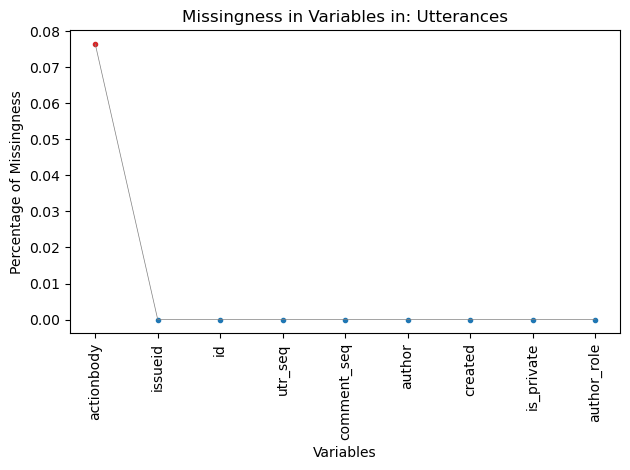

Note: Red points indicate some extent of missingness. Variables for workflow steps are excluded.




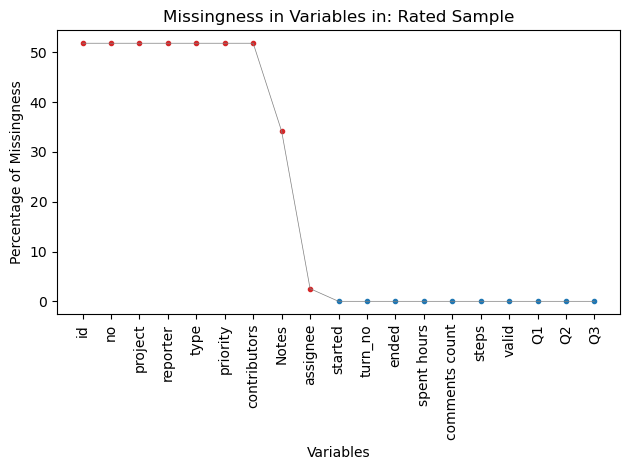

Note: Red points indicate some extent of missingness. Variables for workflow steps are excluded.




In [56]:
def missingness_plot(name, df):
    miss = (df.isna().mean() * 100).sort_values(ascending = False) # amount of missing values in percent
    miss = miss[~miss.index.str.startswith(("wf_", "wfe_"))]       # except for workflow variables

    x = np.arange(1, len(miss) + 1)
    y = miss.values

    complete = (y == 0)   # 0% missing
    missing = ~complete   # >0% missing (everything that is not complete)

    plt.figure()
    plt.plot(x, y, color = "tab:grey", linewidth = "0.5")
    
    plt.scatter(x[missing],  y[missing],  color = "tab:red",  marker = ".")
    plt.scatter(x[complete], y[complete], color = "tab:blue", marker = ".")

    plt.xticks(x, miss.index, rotation = 90)
    plt.xlabel("Variables")
    plt.ylabel("Percentage of Missingness")
    plt.title(f"Missingness in Variables in: {name.title()}")
    plt.tight_layout()
    plt.show()

    print("Note: Red points indicate some extent of missingness. Variables for workflow steps are excluded.\n\n")

for name, df in datasets.items():
    missingness_plot(name, df)

In [36]:
# Convert format
dfi["issue_created"]         = pd.to_datetime(dfi["issue_created"],         format = 'ISO8601')
dfi["last_change_date"]      = pd.to_datetime(dfi["last_change_date"],      format = 'ISO8601')
dfi["issue_resolution_date"] = pd.to_datetime(dfi["issue_resolution_date"], format = 'ISO8601')

dfs["issue_created"]         = pd.to_datetime(dfs["issue_created"],         format = 'ISO8601')
dfs["last_change_date"]      = pd.to_datetime(dfs["last_change_date"],      format = 'ISO8601')
dfs["issue_resolution_date"] = pd.to_datetime(dfs["issue_resolution_date"], format = 'ISO8601')

In [41]:
# Sanity check 1: Chronological order of ticket creation and resolution
print("Issues: Created after resolved:", int((dfi["issue_created"] > dfi["issue_resolution_date"]).sum()), "cases. ✓")
print("Issues: Created after resolved:", int((dfi["issue_created"] > dfi["issue_resolution_date"]).sum()), "cases. ✓")

# Sanity check 2: Chronological order of processing tickets
print("Snapshot: Started after ended:", int((dfs["started"] > dfs["ended"]).sum()), "cases. ✓")
print("Snapshot: Started after ended:", int((dfs["started"] > dfs["ended"]).sum()), "cases. ✓")

Issues: Created after resolved: 0 cases. ✓
Issues: Created after resolved: 0 cases. ✓
Snapshot: Started after ended: 0 cases. ✓
Snapshot: Started after ended: 0 cases. ✓


In [42]:
dfi_ids = set(dfi["id"].dropna().unique())

if "id" in dfs.columns:
    dfs_ids = dfs["id"].dropna().unique()
    pct = 100 * np.mean([x in dfi_ids for x in dfs_ids]) if len(dfs_ids) else np.nan
    print(f"Issue IDs in Snapshot found in Issue IDs: {pct:.2f}% of unique IDs\n")

if "issueid" in dfch.columns:
    dfch_ids = dfch["issueid"].dropna().unique()
    pct = 100 * np.mean([x in dfi_ids for x in dfch_ids]) if len(dfch_ids) else np.nan
    print(f"Issue ID in Change History found in Issue IDs: {pct:.2f}% of unique IDs\n")

if "issueid" in dfu.columns:
    dfu_ids = dfu["issueid"].dropna().unique()
    pct = 100 * np.mean([x in dfi_ids for x in dfu_ids]) if len(dfu_ids) else np.nan
    print(f"Issue IDs in Utterances found in Issue IDs: {pct:.2f}% of unique IDs\n")

if dfrate is not None and "id" in dfrate.columns:
    dfrate_ids = dfrate["id"].dropna().unique()
    pct = 100 * np.mean([x in dfi_ids for x in dfrate_ids]) if len(dfrate_ids) else np.nan
    print(f"Issue IDs in Performance Ratings found in Issue IDs: {pct:.2f}% of unique IDs\n")

Issue IDs in Snapshot found in Issue IDs: 100.00% of unique IDs

Issue ID in Change History found in Issue IDs: 100.00% of unique IDs

Issue IDs in Utterances found in Issue IDs: 100.00% of unique IDs

Issue IDs in Performance Ratings found in Issue IDs: 100.00% of unique IDs



In [103]:
# Numeric variables only
dfi_num = dfi.select_dtypes(include = "number").copy()                         # as dataframe
dfi_num = dfi_num.loc[:, ~dfi_num.columns.str.startswith(("wfe_", "issue_"))]  # excludes the accumulated workflow steps a ticket has passed

dfi_num_col = dfi_num.columns.tolist()                                         # as list

# Correlation matrix
corr_matrix = dfi_num.corr(method = "spearman")

# Convert correlation matrix to a long table
corr_table = corr_matrix.unstack().reset_index()
corr_table.columns = ["Variable1", "Variable2", "Correlation"]

# Each pair only once
corr_table = corr_table[corr_table["Variable1"] < corr_table["Variable2"]]

# Drop missing correlations
corr_table = corr_table.dropna(subset = ["Correlation"]) 

# Sort (large to small)
corr_table["Absolute Correlation"] = corr_table["Correlation"].abs()
corr_table = corr_table.sort_values("Absolute Correlation", ascending = False).drop(columns = "Absolute Correlation")

# Display
display(corr_table[(corr_table["Correlation"].abs() != 1.0)
                 & (corr_table["Correlation"] != 0.0)].head(25).round(3))     # except for corr = 1.00 or 0.00

,Variable1,Variable2,Correlation
455,wf_total_time,wf_waiting,0.811
86,wf_open,wf_total_time,0.802
465,processing_steps,wf_open,-0.741
429,wf_pending_deployment,wf_to_do,0.700
438,wf_pending_deployment,wf_total_time,0.682
452,wf_total_time,wf_validation,0.638
196,wf_testing_monitoring,wf_total_time,0.623
254,wf_to_do,wf_validation,-0.619
145,wf_pending_customer_approval,wf_resolved_under_monitoring,0.600
20,wf_in_review,wf_total_time,0.587


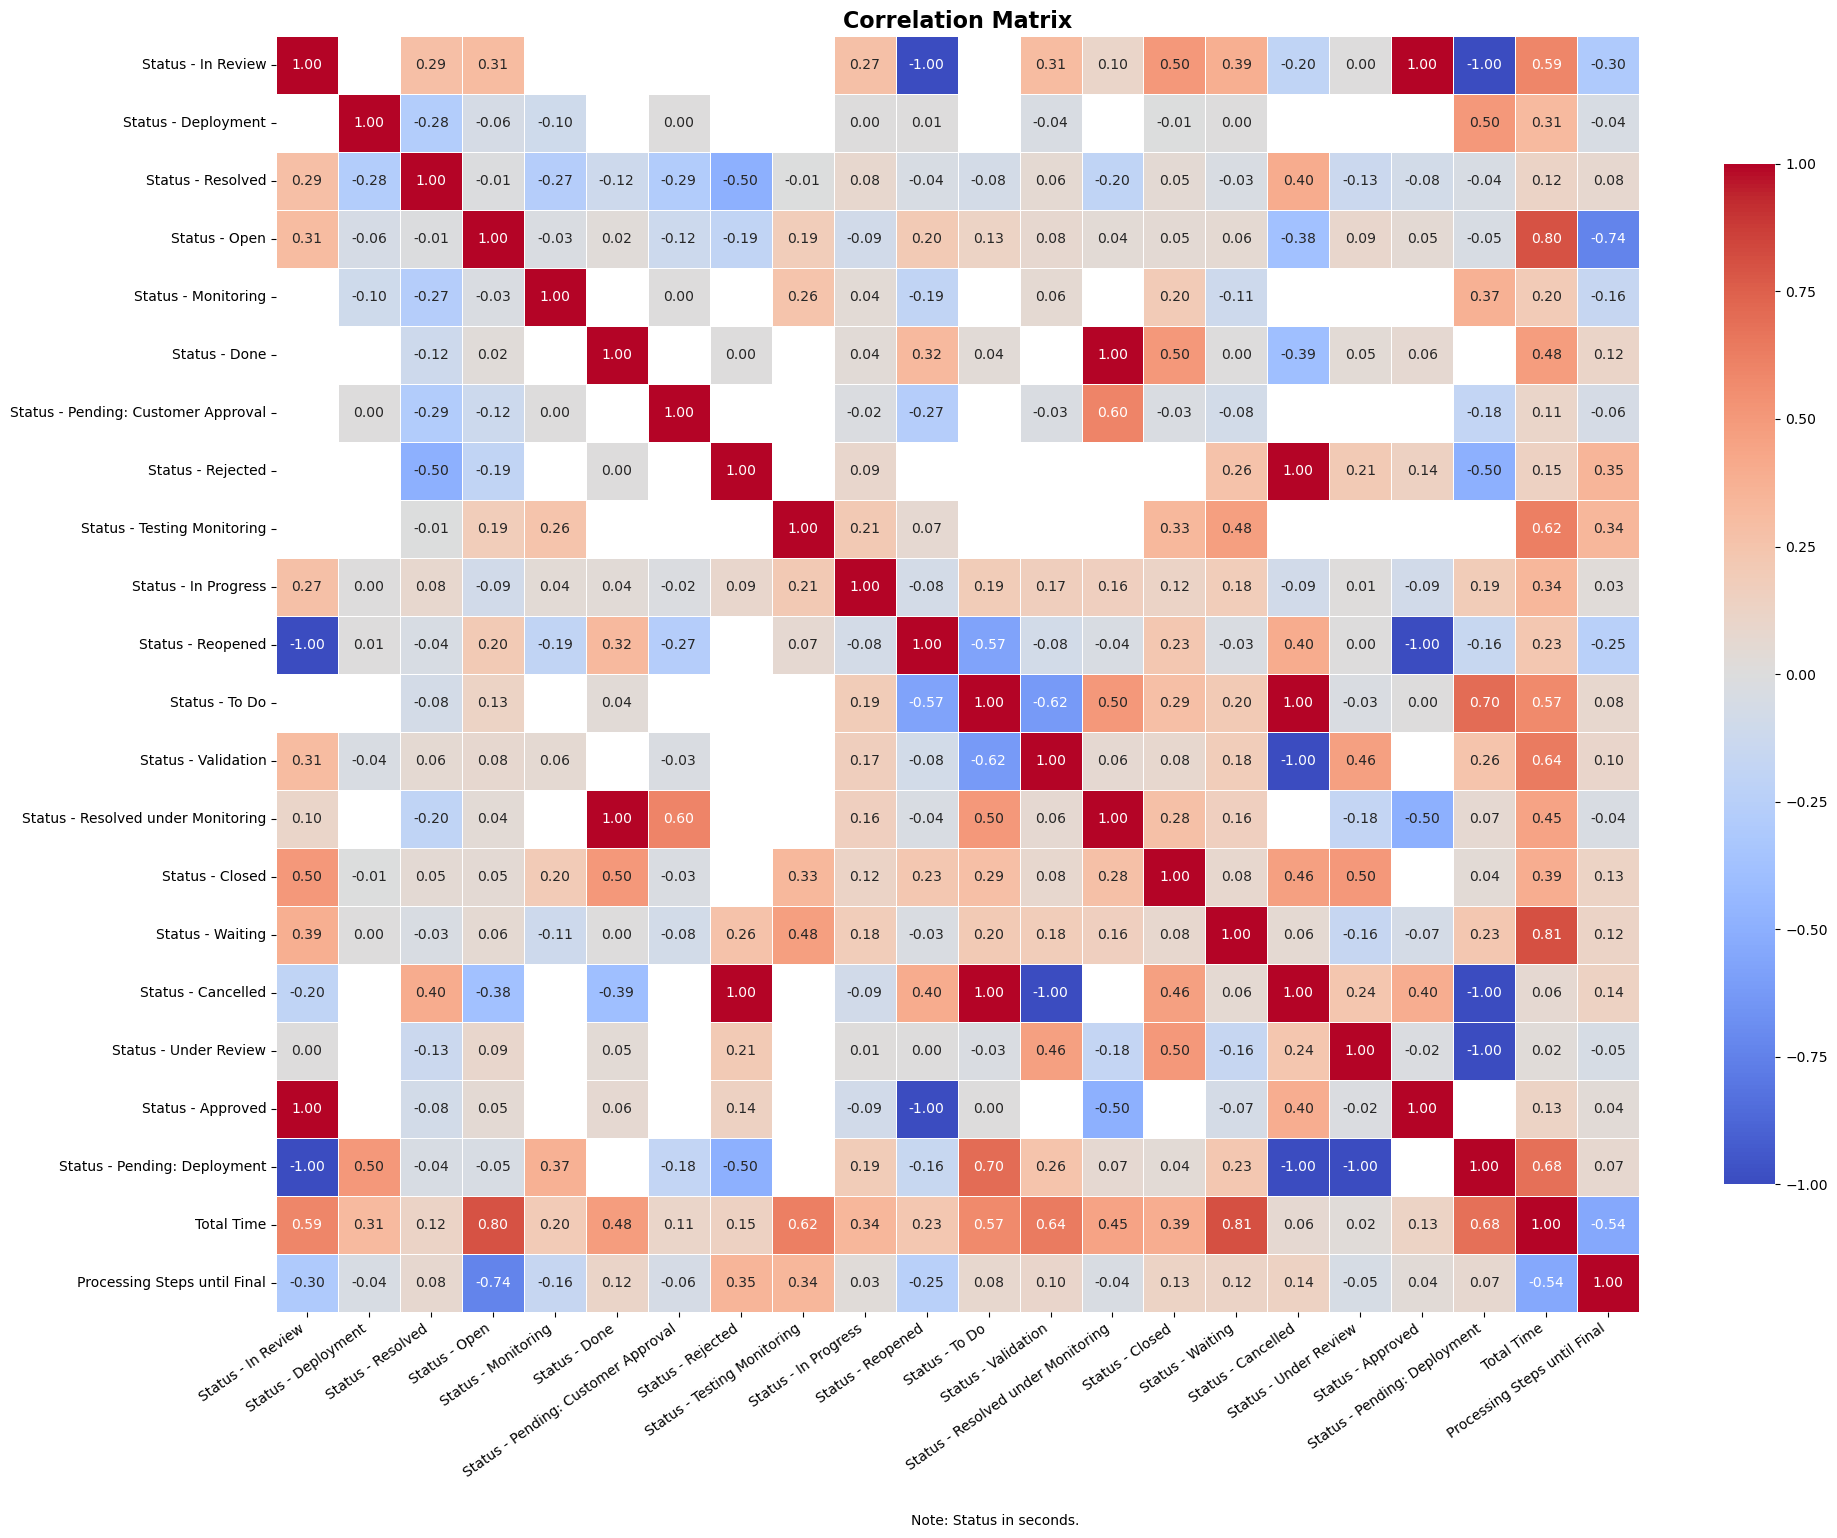

In [128]:
num_var_plot = {'issue_contr_count'            : "Number of Assignees", 
                'issue_comments_count'         : "Number of Comments", 
                'wf_in_review'                 : "Status - In Review", 
                'wf_deployment'                : "Status - Deployment", 
                'wf_resolved'                  : "Status - Resolved", 
                'wf_open'                      : "Status - Open", 
                'wf_monitoring'                : "Status - Monitoring", 
                'wf_done'                      : "Status - Done", 
                'wf_pending_customer_approval' : "Status - Pending: Customer Approval", 
                'wf_rejected'                  : "Status - Rejected", 
                'wf_testing_monitoring'        : "Status - Testing Monitoring", 
                'wf_in_progress'               : "Status - In Progress", 
                'wf_reopened'                  : "Status - Reopened", 
                'wf_to_do'                     : "Status - To Do", 
                'wf_validation'                : "Status - Validation", 
                'wf_resolved_under_monitoring' : "Status - Resolved under Monitoring", 
                'wf_closed'                    : "Status - Closed", 
                'wf_waiting'                   : "Status - Waiting", 
                'wf_cancelled'                 : "Status - Cancelled", 
                'wf_under_review'              : "Status - Under Review", 
                'wf_approved'                  : "Status - Approved", 
                'wf_pending_deployment'        : "Status - Pending: Deployment", 
                'wf_total_time'                : "Total Time", 
                'processing_steps'             : "Processing Steps until Final" 
               }

corr_plot = corr_matrix.rename(index = num_var_plot, columns = num_var_plot)

plt.figure(figsize = (20, 15))
sns.heatmap(corr_plot, 
            annot      = True,      # values
            fmt        = ".2f",     # 2 digits
            cmap       = "coolwarm",   
            linewidths = .5,
            cbar_kws   = {"shrink": .8})
plt.xticks(rotation = 35, ha = "right")
plt.title("Correlation Matrix", fontsize = 16, fontweight = "bold")
plt.tight_layout()
plt.figtext(0.5, -0.02, "Note: Status in seconds.", ha = "center", fontsize = 10)
plt.show();

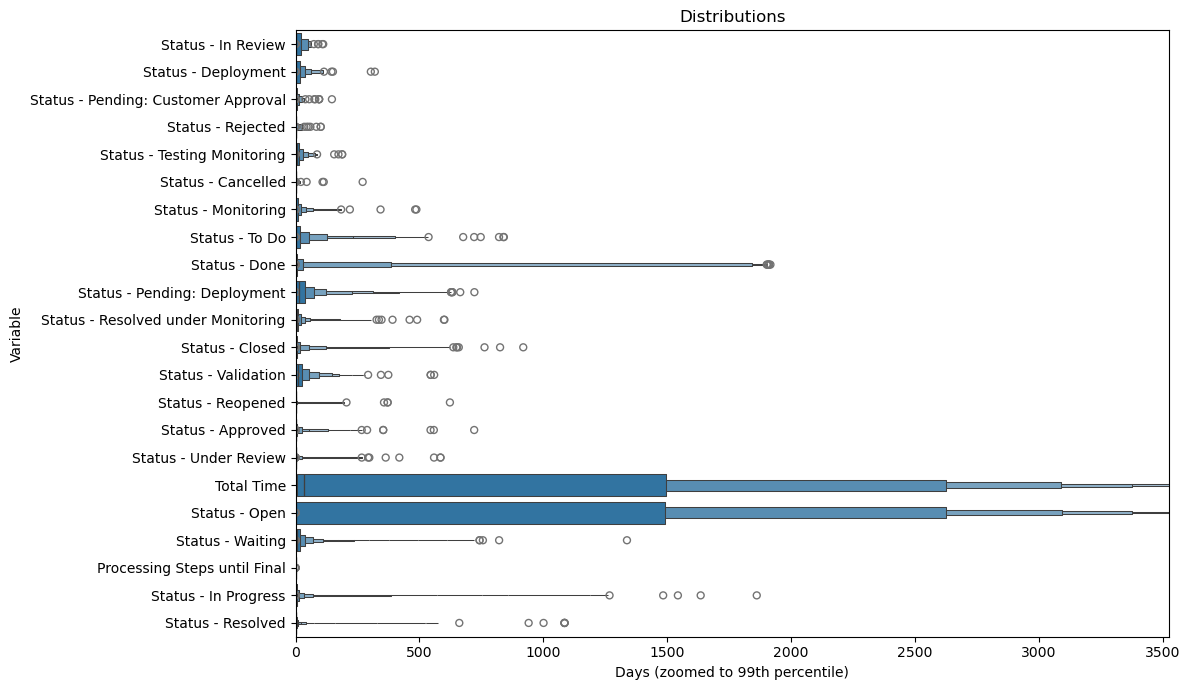

In [132]:
# Function for calculating outliers
def calculate_outliers(series):
    s = series.dropna()
    if s.empty:
        return pd.Series({"N": 0,
                          "Number of Outliers": 0,
                          "Lower Bound": np.nan,
                          "Upper Bound": np.nan})

    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    n_outliers = ((s < lower) | (s > upper)).sum()

    return pd.Series({
        "N": int(s.shape[0]),
        "Number of Outliers": int(n_outliers),
        "Lower Bound": float(lower),
        "Upper Bound": float(upper)
    })

# Calulating outliers for numeric variables
dfi_num_outliers = (
    dfi_num.apply(calculate_outliers).T
    .round(4)
    .reset_index()
    .rename(columns = {"index": "Column"})
    #.sort_values("Column")
    .reset_index(drop = True)
)

dfi_num_outliers_col = (dfi_num_outliers.sort_values("Number of Outliers", ascending = True)["Column"].tolist())

dfi_num_outliers_col_long = (
    (dfi_num[dfi_num_outliers_col] / 86400)  # convert seconds to days
        .melt(var_name = "Variable", value_name = "Days")
        .dropna()
)

boxenplot = dfi_num_outliers_col_long.copy()
boxenplot["Variable"] = boxenplot["Variable"].replace(num_var_plot)

plt.figure(figsize = (12, 7))
sns.boxenplot(data = boxenplot, y = "Variable", x = "Days", orient = "h")
plt.xlim(0, dfi_num_outliers_col_long["Days"].quantile(0.99))
plt.xlabel("Days (zoomed to 99th percentile)")
plt.title("Distributions")
plt.tight_layout()
plt.show()

In [ ]:
# Selected categorical variables (excludes variables with too many unique values)
dfi_cat_cols = [
    "issue_type",      # 15 categorical → easy
    "issue_priority",  # 7 categorical → easy
    "issue_resolution",# 4 categorical → easy
    "issue_status",    # 15 categorical → ok
    "country_code",    # 19 categorical → ok
    #'issue_proj',     # Attention: ~358 unique → producted ~357 dummies → very wide! Have no correlation
    #'client_product'  # ~285 unique
    "issue_assignee",  # ~375 unique / NA's to unassigned
]
# as dataframe
dfi_cat = dfi[["issue_type", "issue_priority", "issue_resolution",
               "issue_status", "country_code", "issue_assignee"]]   # as dataframe
dfi_cat_col = dfi_cat.columns.tolist()                              # as list

#dfi_cat = dfi[
#    [
#    "issue_type",      # 15 categorical → easy
#    "issue_priority",  # 7 categorical → easy
#    "issue_resolution",# 4 categorical → easy
#    "issue_status",    # 15 categorical → ok
#    "country_code",    # 19 categorical → ok
#    #'issue_proj',     # Attention: ~358 unique → producted ~357 dummies → very wide! Have no correlation
#    #'client_product', # ~285 unique
#    "issue_assignee"   # ~375 unique / NA's to unassigned
#    ]
#]



# 
dfi_subset = pd.concat([dfi_num_cols, dfi_cat_cols], axis = 1)


dfi_dummy = pd.get_dummies(dfi_subset,
                           columns = dfi_cat_col,
                           drop_first = True,
                           dtype = int
                          )

# Correlation matrix
corr_matrix_dummy = dfi_dummy.corr()

# Control issue
print("Shape von numeric_issues_dummies:", dfi_dummy.shape)
print("Anzahl Dummiespaltenspalten:", len(dfi_dummy.columns) - len(dfi_num_col))
print("Beispiel-Korrelationsmatrix (erste 10x10):")
print(corr_matrix_dummies.iloc[:10, :10])


# Convert correlation matrix to a long table
corr_table_dummy = corr_matrix_dummy.unstack().reset_index()
corr_table_dummy.columns = ["Variable1", "Variable2", "Correlation"]

# Each pair only once
corr_table_dummy = corr_table_dummy[corr_table_dummy["Variable1"] < corr_table_dummy["Variable2"]]

# Drop missing correlations
corr_table_dummy = corr_table_dummy.dropna(subset = ["Correlation"]) #what happens if I remove subset?

# Sort (large to small)
corr_table_dummy["Absolute Correlation"] = corr_table_dummy["Correlation"].abs()
corr_table_dummy = corr_table_dummy.sort_values("Absolute Correlation", ascending = False).drop(columns = "Absolute Correlation")

# Display
print(corr_table_dummy)
print(corr_table_dummy.head(20))


In [ ]:
#For heat map: Create a square matrix from the variables involved.
variables = pd.unique(top_40[['Variable1', 'Variable2']].values.ravel())
n = len(variables)
heatmap_matrix = pd.DataFrame(0.0, index=variables, columns=variables)

#Fill heat map with correlation values
for _, row in top_40.iterrows():
    v1, v2, corr = row['Variable1'], row['Variable2'], row['Correlation']
    heatmap_matrix.loc[v1, v2] = corr
    heatmap_matrix.loc[v2, v1] = corr  # symmetrisch

#Set diagonal to NaN or 0 (do not display autocorrelation)
np.fill_diagonal(heatmap_matrix.values, np.nan)

# Creat heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    heatmap_matrix,
    annot=True,                    # Zeigt die Korrelationswerte an
    fmt='.2f',                     # 2 Nachkommastellen
    cmap='coolwarm',               # Rot = positiv, Blau = negativ
    center=0,                      # 0 ist neutral
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlationscoefficient"},
    mask=heatmap_matrix.isna()     # Nur gefüllte Zellen anzeigen
)

plt.title('Heatmap: Top 20 positive + Top 20 negative correlationen', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout();

plt.savefig(heatmap_save_path, dpi=300, bbox_inches='tight');
print(f"\nHeatmap saved under: {heatmap_save_path}")

    
"""
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_issues_dummies, 
            annot=True,          # Zahlen in die Felder schreiben
            fmt=".2f",           # 2 Nachkommastellen
            cmap='coolwarm',     # Rot-Blau-Farbskala (positiv/negativ)
            center=0,            # 0 zentriert
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8})
plt.title('Correlation matrix dummies')
plt.tight_layout()
plt.show()
"""



In [ ]:
#Save path for big correlation matrix
save_path = '../nov25_bds_int_helpdesk/data/processed/'
os.makedirs(os.path.dirname(save_path), exist_ok=True)


#Creat csv
file_path = os.path.join(save_path, 'corr_matrix_issues_dummies.csv')
corr_matrix_issues_dummies.to_csv(file_path, index=True)
#corr_matrix_issues_dummies.to_csv(save_path)
print(f"Correlationsmatrix saved under: {save_path}")


In [ ]:
print("Snapshot:", dfs.['issue_type'].value_counts()) #cd
print(issues['wf_open'].value_counts()) #cg

In [ ]:
# Variable 'proj_type' decoded FEATURES.md
issues['proj_type'] = 'internal'          # Default: internal
issues['country_code'] = 'internal'        # Default: internal
issues['client_product'] = 'internal'      # Default: internal
external_mask = (issues['issue_proj'].str.len() > 6) & (issues['issue_proj'].str.startswith('C', na=False))
matches = issues.loc[external_mask, 'issue_proj'].str.match(r'^(C\d{2})(.+)$')
issues.loc[external_mask, 'proj_type'] = 'external'
issues.loc[external_mask & matches, 'country_code'] = issues.loc[external_mask & matches, 'issue_proj'].str.extract(r'^(C\d{2})')[0]
issues.loc[external_mask & matches, 'client_product'] = issues.loc[external_mask & matches, 'issue_proj'].str.extract(r'^C\d{2}(.+)$')[0]
issues.loc[issues['issue_proj'].isna(), ['proj_type', 'country_code', 'client_product']] = 'unknown'

#print(issues['proj_type'].value_counts())
#print(issues['country_code'].value_counts())
#print(issues['client_product'].value_counts())
#print(issues['issue_proj'].value_counts())

In [ ]:
groupby_m = dfis.groupby([pd.Grouper(key = 'started', freq = 'ME'), 
                               dfis['issue_type']])\
                     .agg({'id':'count'}).unstack().fillna(0)

groupby_m.plot(figsize = (20, 4.5), style = 'o-').legend(loc='upper left', fontsize=12);

In [ ]:
wf_cols = [c for c in dfi.columns if c.startswith("wf_") and not c.startswith("wfe_")]

# 2) compute mean in days (assuming values are seconds)
mean_days = (dfi[wf_cols].mean(numeric_only=True) / 86400).dropna()

mean_days_sorted = mean_days.sort_values(ascending=False)

plt.figure(figsize=(12, 9))
bars = plt.barh(mean_days_sorted.index, mean_days_sorted.values, color='skyblue')
bars[0].set_color('red')  # wf_open hervorheben

plt.title('Mean time per workflow status (days)\n– bottleneck-analysis –', fontsize=14, fontweight='bold')
plt.xlabel('Mean days')
plt.ylabel('workflow-status')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(mean_days_sorted):
    plt.text(v + mean_days_sorted.max() * 0.01, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
issues.groupby('proj_type')['wf_total_time'].mean()


# Convert total time to days
issues['wf_total_time_days'] = issues['wf_total_time'] / 86400

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 7))

# Fixed boxplot (no more warning)
sns.boxplot(
    data=issues,
    x='proj_type',
    y='wf_total_time_days',
    hue='proj_type',      # Assigns colors correctly
    palette='Set2',
    legend=False,         # Hide unnecessary legend
    boxprops=dict(alpha=0.8)
)

# Overlay individual points (optional, helps see outliers better)
sns.swarmplot(
    data=issues,
    x='proj_type',
    y='wf_total_time_days',
    color='black',
    alpha=0.6,
    size=5
)

# Titles and labels
plt.title('Distribution of Total Workflow Time by Project Type (in Days)\nOutliers shown as points beyond whiskers', 
          fontsize=14, pad=20)
plt.xlabel('Project Type', fontsize=12)
plt.ylabel('Total Workflow Time (Days)', fontsize=12)

# Rotate labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:


# Calculate mean total workflow time per project type
mean_time_per_type = issues.groupby('proj_type')['wf_total_time'].mean()

# Convert seconds to days and sort descending for better visualization
mean_time_days = (mean_time_per_type / 86400).sort_values(ascending=False)

# Create figure with reasonable size
plt.figure(figsize=(10, 6))

# Plot bars with a nice color
bars = plt.bar(mean_time_days.index, mean_time_days.values, color='#4e79a7')

# Set title and axis labels in English
plt.title('Average Total Workflow Time by Project Type (in Days)', fontsize=14, pad=20)
plt.xlabel('Project Type', fontsize=12)
plt.ylabel('Average Time (Days)', fontsize=12)

# Add light horizontal grid for readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2., 
        height + height * 0.01,
        f'{height:.1f}',
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Improve layout and rotate x-axis labels if needed
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [ ]:
groupby_m_time = dfis.groupby([pd.Grouper(key = 'started', freq = 'm'), 
                               dfis['issue_type']])\
                     .agg({'wf_total_time':'mean'}).unstack().fillna(0)

groupby_m_time.plot(figsize = (20, 4.5), style = 'o-').legend(loc='upper left', fontsize=12);

In [ ]:
if "issue_created_dt" in dfi.columns:
    tmp = dfi.dropna(subset=["issue_created_dt"]).set_index("issue_created_dt")
    monthly_counts = tmp.resample("MS").size()

    plt.figure()
    plt.plot(monthly_counts.index, monthly_counts.values)
    plt.title("Ticket Volume over Time (monthly)")
    plt.xlabel("Month")
    plt.ylabel("Number of tickets")
    plt.tight_layout()
    plt.show()

In [ ]:
if "issue_priority" in dfi.columns:
    priority = (dfi["issue_priority"]
                .astype("string")
                .str.strip()
                .fillna("Unknown")
                .str.title()
                .replace({"Unkown": "Unknown"}))
    order = ["Blocker", "Highest", "High", "Medium", "Low", "Lowest", "Unknown"]
    
    plt.figure(); 
    plt.bar(ordered.index, ordered.values); 
    plt.title("Priority"); 
    plt.xticks(rotation = 45, ha = "right"); 
    plt.tight_layout(); 
    plt.show()

In [ ]:
if "wf_total_time" in dfi.columns and pd.api.types.is_numeric_dtype(dfi["wf_total_time"]):
    time = dfi["wf_total_time"].dropna()

    if len(time) > 0:
        plt.figure()
        plt.hist(w, bins=20)
        plt.title("Total Processing Time of Tickets (in sec)")
        plt.xlabel("Seconds")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

In [ ]:
time_df = df.copy()
time_df["wf_total_time_hours"] = time_df["wf_total_time"] / 2592000

plt.figure(figsize = (8, 5))

sns.histplot(data = time_df,
             x = "processing_steps",
             y = "wf_total_time_hours",
             cmap = "managua",
             cbar = True,
             bins = 80,
             pmax = 0.95)
plt.ylabel("Total Processing Time (in Months)")
plt.xlabel("Processing Steps")

plt.title("Time and Steps for Processing Tickets")
plt.tight_layout()
plt.show()

In [ ]:
dfi = pd.crosstab(dfis['issue_type'], dfis['target'], normalize = "index")


In [ ]:
#issues_dummies = pd.get_dummies(issues, columns = ['country_code','proj_type','issue_type','issue_priority','issue_proj','issue_assignee',
#                                                  'issue_type', 'issue_resolution', 'issue_status', 'client_product'])

#    Select categorical columns that you want to dummy-code
#    Choose wisely – too many unique values (e.g., issue_proj has ~358) will generate a lot of columns!
categorical_cols = [
    'issue_type',        # 15 categorical → easy
    'issue_priority',    # 7 categorical → easy
    'issue_resolution',  # 4 categorical → easy
    'issue_status',      # 15 categorical → ok
    'country_code',      # 19 categorical → ok
    #'issue_proj',      # Attention: ~358 unique → producted ~357 dummies → very wide! Have no correlation
    #'client_product',  # ~285 unique
    'issue_assignee'   # ~375 unique / NA's to unassigned
]

# Remove columns that do not exist (for safety's sake)
categorical_cols = [col for col in categorical_cols if col in issues.columns]

# Automatically select numeric columns (int/float)
numeric_cols = issues.select_dtypes(include=['int64', 'float64']).columns.tolist()

# DataFrame with only numeric + desired categorical columns
issues_selected = issues[numeric_cols + categorical_cols].copy()

# Create dummy variables
#    - dtype=int → directly 0 and 1 (no True/False)
#    - drop_first=True → avoids multicollinearity (one category becomes reference)
issues_with_dummies = pd.get_dummies(
    issues_selected,
    columns=categorical_cols,
    drop_first=True,
    dtype=int
)

# Final DataFrame: ONLY numeric columns (original num + dummies as 0/1)
numeric_issues_dummies = issues_with_dummies.select_dtypes(include=['int64', 'float64', 'int32'])

# Calculate correlation matrix
corr_matrix_issues_dummies = numeric_issues_dummies.corr()

# Control issue
print("Shape von numeric_issues_dummies:", numeric_issues_dummies.shape)
print("Anzahl Dummiespaltenspalten:", len(numeric_issues_dummies.columns) - len(numeric_cols))
print("Beispiel-Korrelationsmatrix (erste 10x10):")
print(corr_matrix_issues_dummies.iloc[:10, :10])


#Save path for big correlation matrix
save_path = '../nov25_bds_int_helpdesk/data/processed/'
os.makedirs(os.path.dirname(save_path), exist_ok=True)


#Creat csv
file_path = os.path.join(save_path, 'corr_matrix_issues_dummies.csv')
corr_matrix_issues_dummies.to_csv(file_path, index=True)
#corr_matrix_issues_dummies.to_csv(save_path)
print(f"Correlationsmatrix saved under: {save_path}")

# Evaluation: Top 20 positive and negative correlations
corr_unstacked = corr_matrix_issues_dummies.unstack().reset_index()
corr_unstacked.columns = ['Variable1', 'Variable2', 'Correlation']
corr_unstacked = corr_unstacked[corr_unstacked['Variable1'] < corr_unstacked['Variable2']]

#Remove duplicates (only consider A < B)
top_positive = corr_unstacked.sort_values('Correlation', ascending=False).head(20)
top_negative = corr_unstacked.sort_values('Correlation', ascending=True).head(20)


# Output
#print("\nTop 20 positive correlationen:")
#print(top_positive.to_string(index=False))

#print("\nTop 20 negative correlationen:")
#print(top_negative.to_string(index=False))
#----------------------------------------------------------------------------------------------

#Path for png headmap To20 -1 & 1
heatmap_save_path = '../data/processed/'
file_path = os.path.join(heatmap_save_path, 'correlation_top40_heatmap.png')

os.makedirs(os.path.dirname(heatmap_save_path), exist_ok=True)
corr_matrix = pd.read_csv('../data/processed/corr_matrix_issues_dummies.csv', index_col=0)

# Unstack correlations and remove duplicates (only A < B)
corr_unstacked = corr_matrix.unstack().reset_index()
corr_unstacked.columns = ['Variable1', 'Variable2', 'Correlation']

# Only unique pairs (avoiding A→B and B→A)
corr_pairs = corr_unstacked[corr_unstacked['Variable1'] < corr_unstacked['Variable2']].copy()

# Top 20 positive and top 20 negative
top_positive = corr_pairs.nlargest(20, 'Correlation')
top_negative = corr_pairs.nsmallest(20, 'Correlation')


#Combine both → Top 40 most extreme correlations
top_40 = pd.concat([top_positive, top_negative]).sort_values('Correlation', ascending=False)


print("Top 40 extrem correlationen (positiv + negativ):")
print(top_40[['Variable1', 'Variable2', 'Correlation']].to_string(index=False))


#For heat map: Create a square matrix from the variables involved.
variables = pd.unique(top_40[['Variable1', 'Variable2']].values.ravel())
n = len(variables)
heatmap_matrix = pd.DataFrame(0.0, index=variables, columns=variables)

#Fill heat map with correlation values
for _, row in top_40.iterrows():
    v1, v2, corr = row['Variable1'], row['Variable2'], row['Correlation']
    heatmap_matrix.loc[v1, v2] = corr
    heatmap_matrix.loc[v2, v1] = corr  # symmetrisch

#Set diagonal to NaN or 0 (do not display autocorrelation)
np.fill_diagonal(heatmap_matrix.values, np.nan)

# Creat heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    heatmap_matrix,
    annot=True,                    # Zeigt die Korrelationswerte an
    fmt='.2f',                     # 2 Nachkommastellen
    cmap='coolwarm',               # Rot = positiv, Blau = negativ
    center=0,                      # 0 ist neutral
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlationscoefficient"},
    mask=heatmap_matrix.isna()     # Nur gefüllte Zellen anzeigen
)

plt.title('Heatmap: Top 20 positive + Top 20 negative correlationen', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout();

plt.savefig(heatmap_save_path, dpi=300, bbox_inches='tight');
print(f"\nHeatmap saved under: {heatmap_save_path}")

    
"""
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_issues_dummies, 
            annot=True,          # Zahlen in die Felder schreiben
            fmt=".2f",           # 2 Nachkommastellen
            cmap='coolwarm',     # Rot-Blau-Farbskala (positiv/negativ)
            center=0,            # 0 zentriert
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8})
plt.title('Correlation matrix dummies')
plt.tight_layout()
plt.show()
"""




In [ ]:
mean_days_sorted = mean_days.sort_values(ascending=False)

plt.figure(figsize=(12, 9))
bars = plt.barh(mean_days_sorted.index, mean_days_sorted.values, color='skyblue')
bars[0].set_color('red')  # wf_open hervorheben

plt.title('Mean time per workflow status (days)\n– bottleneck-analysis –', fontsize=14, fontweight='bold')
plt.xlabel('Mean days')
plt.ylabel('workflow-status')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(mean_days_sorted):
    plt.text(v + mean_days_sorted.max() * 0.01, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
issues.groupby('proj_type')['wf_total_time'].mean()


# Convert total time to days
issues['wf_total_time_days'] = issues['wf_total_time'] / 86400

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 7))

# Fixed boxplot (no more warning)
sns.boxplot(
    data=issues,
    x='proj_type',
    y='wf_total_time_days',
    hue='proj_type',      # Assigns colors correctly
    palette='Set2',
    legend=False,         # Hide unnecessary legend
    boxprops=dict(alpha=0.8)
)

# Overlay individual points (optional, helps see outliers better)
sns.swarmplot(
    data=issues,
    x='proj_type',
    y='wf_total_time_days',
    color='black',
    alpha=0.6,
    size=5
)

# Titles and labels
plt.title('Distribution of Total Workflow Time by Project Type (in Days)\nOutliers shown as points beyond whiskers', 
          fontsize=14, pad=20)
plt.xlabel('Project Type', fontsize=12)
plt.ylabel('Total Workflow Time (Days)', fontsize=12)

# Rotate labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:


# Calculate mean total workflow time per project type
mean_time_per_type = issues.groupby('proj_type')['wf_total_time'].mean()

# Convert seconds to days and sort descending for better visualization
mean_time_days = (mean_time_per_type / 86400).sort_values(ascending=False)

# Create figure with reasonable size
plt.figure(figsize=(10, 6))

# Plot bars with a nice color
bars = plt.bar(mean_time_days.index, mean_time_days.values, color='#4e79a7')

# Set title and axis labels in English
plt.title('Average Total Workflow Time by Project Type (in Days)', fontsize=14, pad=20)
plt.xlabel('Project Type', fontsize=12)
plt.ylabel('Average Time (Days)', fontsize=12)

# Add light horizontal grid for readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2., 
        height + height * 0.01,
        f'{height:.1f}',
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Improve layout and rotate x-axis labels if needed
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [ ]:
print(issues.groupby('issue_priority')['wf_open'].mean())

# Calculate mean time in 'Open' status per priority
mean_open_time = issues.groupby('issue_priority')['wf_open'].mean()

# Convert seconds to days
mean_open_days = mean_open_time / 86400

# Define a logical order for priorities (adjust if your values differ)
priority_order = ['Blocker', 'High', 'Highest', 'Low', 'Lowest', 'Medium', 'unknown']  # common order
# If your priorities have different names/spellings, update this list accordingly

# Reindex to enforce order (drops any priorities not in the list, adds missing as NaN)
mean_open_days_ordered = mean_open_days.reindex(priority_order)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(mean_open_days_ordered.index, mean_open_days_ordered.values, color='#e45756')

# Add title and labels in English
plt.title('Average Time in "Open" Status by Issue Priority (in Days)', fontsize=14, pad=20)
plt.xlabel('Average Time (Days)', fontsize=12)
plt.ylabel('Issue Priority', fontsize=12)

# Add light vertical grid for easier reading
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Display values to the right of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}',
             ha='left', va='center', fontsize=10)

# Improve layout
plt.tight_layout()
plt.show()